In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets, layers, models

import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import scipy



In [7]:
img = image.load_img("basedata/train/ambulance/1.jpg")

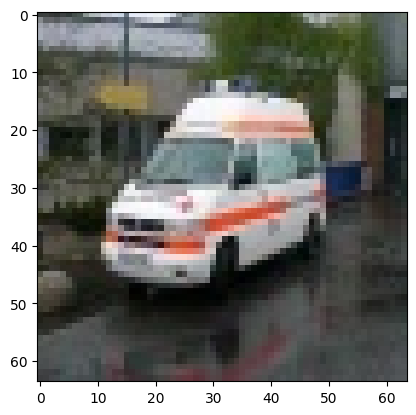

In [8]:
plt.imshow(img)

In [9]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [10]:
train_dataset = train.flow_from_directory('basedata/train/',target_size=(200,200),batch_size=3,class_mode='binary')

validation_dataset = validation.flow_from_directory('basedata/validation/',target_size=(200,200),batch_size=3,class_mode='binary')

Found 58 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


In [11]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(16,(3,3), activation='relu',input_shape=(200,200,3)),
        tf.keras.layers.MaxPool2D(2,2),
        #
        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        #
        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        ##
        tf.keras.layers.Flatten(),
        ##
        tf.keras.layers.Dense(512,activation='relu'),
        ##
        tf.keras.layers.Dense(1,activation='sigmoid')
    ]
)

In [12]:
model.compile(loss='binary_crossentropy',optimizer= RMSprop(lr=0.001),metrics=['accuracy'])

In [14]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch=3,
                      epochs=30,
                      validation_data=validation_dataset)

Epoch 1/30
3/3 [==============================] - 1s 500ms/step - loss: 1.0709 - accuracy: 0.7143 - val_loss: 0.5450 - val_accuracy: 0.7931
Epoch 2/30
3/3 [==============================] - 2s 584ms/step - loss: 0.6865 - accuracy: 0.6667 - val_loss: 0.5217 - val_accuracy: 0.9310
Epoch 3/30
3/3 [==============================] - 1s 498ms/step - loss: 0.4970 - accuracy: 1.0000 - val_loss: 0.6812 - val_accuracy: 0.5172
Epoch 4/30
3/3 [==============================] - 1s 508ms/step - loss: 0.5349 - accuracy: 0.8889 - val_loss: 0.4273 - val_accuracy: 0.8276
Epoch 5/30
3/3 [==============================] - 1s 490ms/step - loss: 0.1980 - accuracy: 1.0000 - val_loss: 0.4417 - val_accuracy: 0.7586
Epoch 6/30
3/3 [==============================] - 1s 402ms/step - loss: 0.8568 - accuracy: 0.5714 - val_loss: 1.3781 - val_accuracy: 0.5172
Epoch 7/30
3/3 [==============================] - 1s 453ms/step - loss: 0.6701 - accuracy: 0.8889 - val_loss: 0.5510 - val_accuracy: 0.5517
Epoch 8/30
3/3 [====

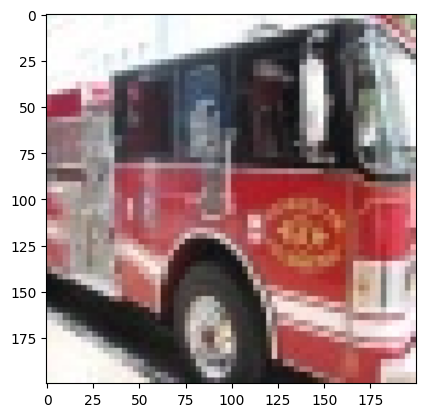

1/1 [==============================] - 0s 38ms/step
Prediction is firetruck


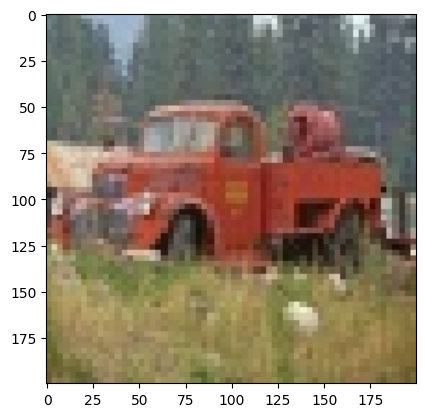

1/1 [==============================] - 0s 37ms/step
Prediction is firetruck


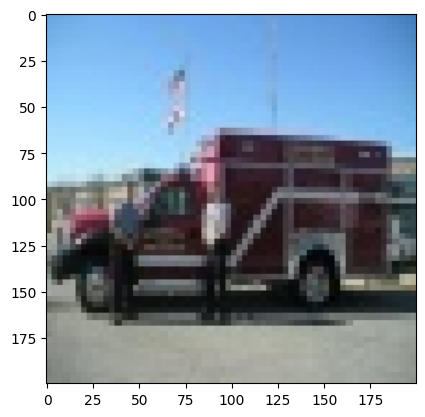

1/1 [==============================] - 0s 22ms/step
Prediction is firetruck


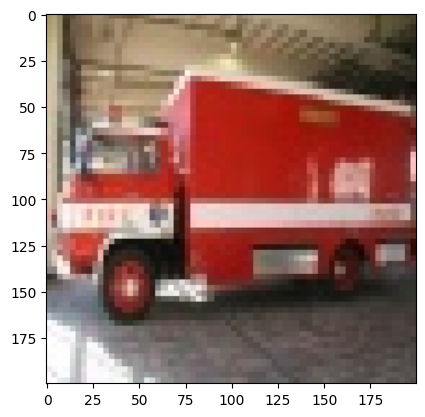

1/1 [==============================] - 0s 12ms/step
Prediction is firetruck


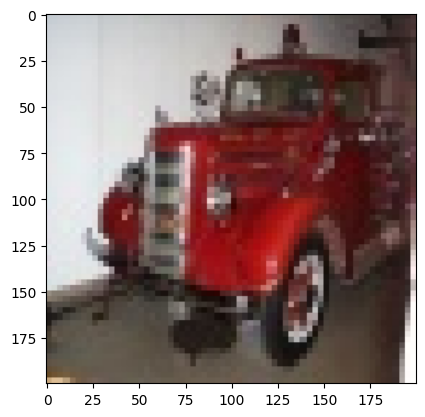

1/1 [==============================] - 0s 28ms/step
Prediction is firetruck


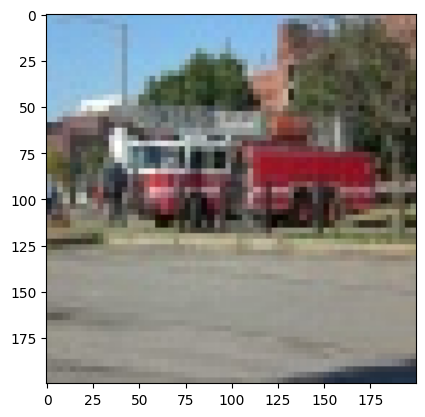

1/1 [==============================] - 0s 27ms/step
Prediction is firetruck


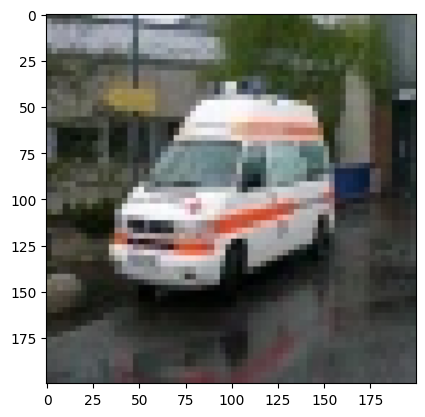

1/1 [==============================] - 0s 36ms/step
Prediction is ambulance


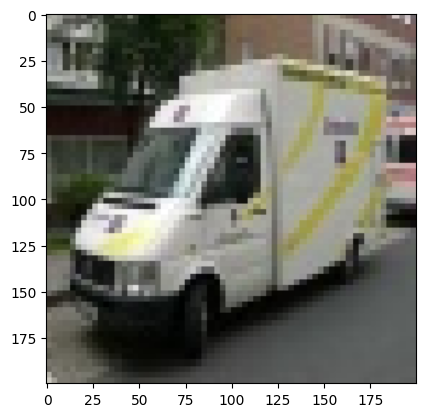

1/1 [==============================] - 0s 37ms/step
Prediction is ambulance


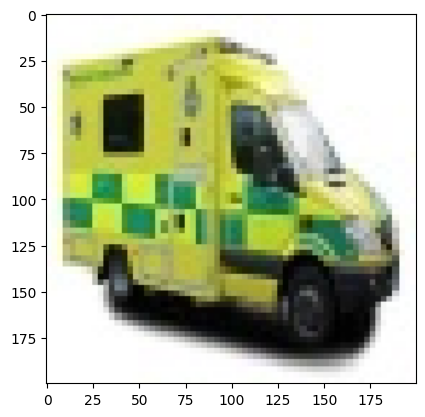

1/1 [==============================] - 0s 26ms/step
Prediction is ambulance


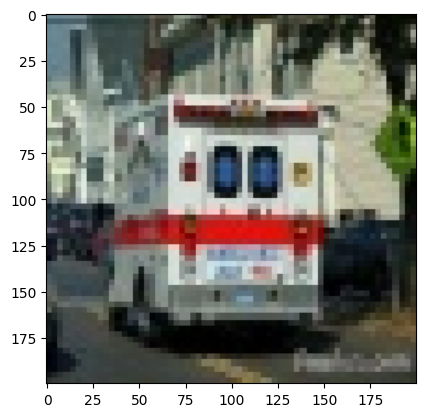

1/1 [==============================] - 0s 36ms/step
Prediction is ambulance


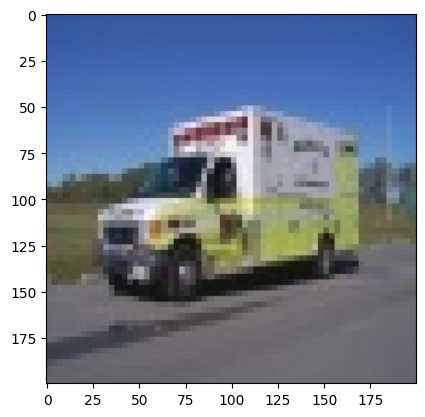

1/1 [==============================] - 0s 26ms/step
Prediction is ambulance


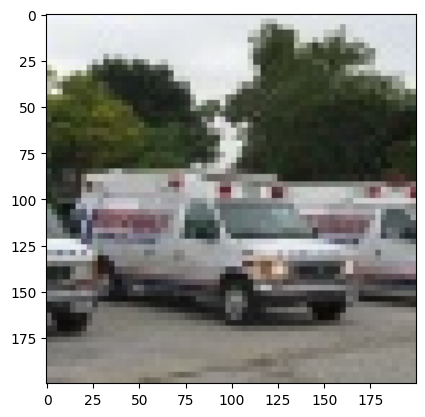

1/1 [==============================] - 0s 40ms/step
Prediction is ambulance


In [28]:
dir_path = 'basedata/test'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    # print(i)

    X= image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("Prediction is ambulance")
    else:
        print("Prediction is firetruck")